In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [2]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



## Simple boxplot func

In [3]:
green_diamond = dict(markerfacecolor='g', marker='D')

def simple_boxplot(my_dict, fig_name, save_flag):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys())
    plt.ylim(-1,600)
    plt.tight_layout()
    if save_flag:
        plt.savefig(fig_name+'.png')

In [4]:
num_robot = 24
experiment_time = 1800
num_run = 100

In [94]:
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/Respawn#30_2021-07-08_robots#24MIXED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/Respawn#30_2021-07-08_robots#24MIXED'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/brownian/Regions'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/persistent/Regions'
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/adaptive/Regions'

In [95]:
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/adaptive/Regions exists


In [96]:
completed_task_label = ["time", "areaID", "creation_time", "completion_time", "type", "kID_on_top", "kIDs"]

## Completed mixed areas in details (split blue and red)

In [97]:
completed_task_blue_dict = {}
completed_task_red_dict = {}

timeout = -1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
#             print(param.split("#")[-1])
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    completed_task_count_red = []
    completed_task_count_blue = []
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("completed_taskLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                completed_task_blue_dict[str(timeout)] = 0
                completed_task_red_dict[str(timeout)] = 0
                continue
#             print('\tfilename: ', filename)
            
            df_completedTask = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            df_completedTask.columns = completed_task_label
            
            completed_task_count_blue += [df_completedTask.loc[df_completedTask['type'] == 0].shape[0]]
            completed_task_count_red += [df_completedTask.loc[df_completedTask['type'] == 1].shape[0]]
            
    if(len(completed_task_count_blue)+len(completed_task_count_red)!= 100):
        print(colored("\tWARNING, completed_task_count should be 100!", 'red'))
    print(colored("\tlen(completed_task_count)"+str(len(completed_task_count_blue)+len(completed_task_count_red)), 'blue'))
    completed_task_blue_dict[str(timeout)] = completed_task_count_blue
    completed_task_red_dict[str(timeout)] = completed_task_count_red
    
            


Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#1_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 10
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#3_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 30
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#6_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 60
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#12_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 120
	WARNING, completed_task_count should be 100!
	len(completed_task_count)200
Timeout folder: Regions_AdaptiveWalk_2021-07-12_robots#24_timeout#18_respawn#30_NumAreas#16_redAreas#8_1800#seconds
	timeout: 180
	WARNING, completed_task_count should be 100!
	len(c

In [93]:
brownian_dict_blue = completed_task_blue_dict
brownian_dict_red = completed_task_red_dict

In [88]:
persistent_dict_blue = completed_task_blue_dict
persistent_dict_red = completed_task_red_dict

In [98]:
adaptive_dict_blue = completed_task_blue_dict
adaptive_dict_red = completed_task_red_dict

In [68]:
def set_box_color(bp, edge_color, fill_color):
    plt.setp(bp['boxes'], color=edge_color)
    plt.setp(bp['whiskers'], color=edge_color)
    plt.setp(bp['caps'], color=edge_color)
    plt.setp(bp['medians'], color=edge_color)
    plt.setp(bp['fliers'], color=edge_color)
    
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

In [86]:
def boxplot_3dict(dictl, dictc, dictr):
    ticks = dictr.keys()

    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)

    bpl = ax.boxplot(dictl.values(), patch_artist=True, positions=np.array(range(len(dictl.values())))*3.0-0.6, sym='', widths=0.4)
    bpr = ax.boxplot(dictr.values(), patch_artist=True,  positions=np.array(range(len(dictr.values())))*3.0+0.6, sym='', widths=0.4)
    bpc = ax.boxplot(dictc.values(), patch_artist=True,  positions=np.array(range(len(dictc.values())))*3.0, sym='', widths=0.4)

    set_box_color(bpl, 'red', 'tan') # colors are from http://colorbrewer2.org/
    set_box_color(bpr, 'blue', 'cyan')
    set_box_color(bpc, 'green', '#BCEE68')

    # draw temporary red and blue lines and use them to create a legend
    plt.plot([], c='red', label='Brownian')
    plt.plot([], c='green', label='Persistent')
    plt.plot([], c='blue', label='Adaptive')
    plt.legend(loc=2)

    # plt.xticks(range(0, 300, 5), ticks)
    # plt.xlim(-3, len(ticks)*3)
    # plt.ylim(0, 80)
    plt.xticks(range(0, len(ticks) * 3, 3), ticks)
    plt.xlim(-2, len(ticks)*3)

    ax.set_xticklabels(dictr.keys())
    ax.set_xlabel("Timeout[s]")
    ax.set_ylabel("Completed areas blue")
    ax.grid()

    plt.tight_layout()
    # plt.savefig('boxcompare.png')

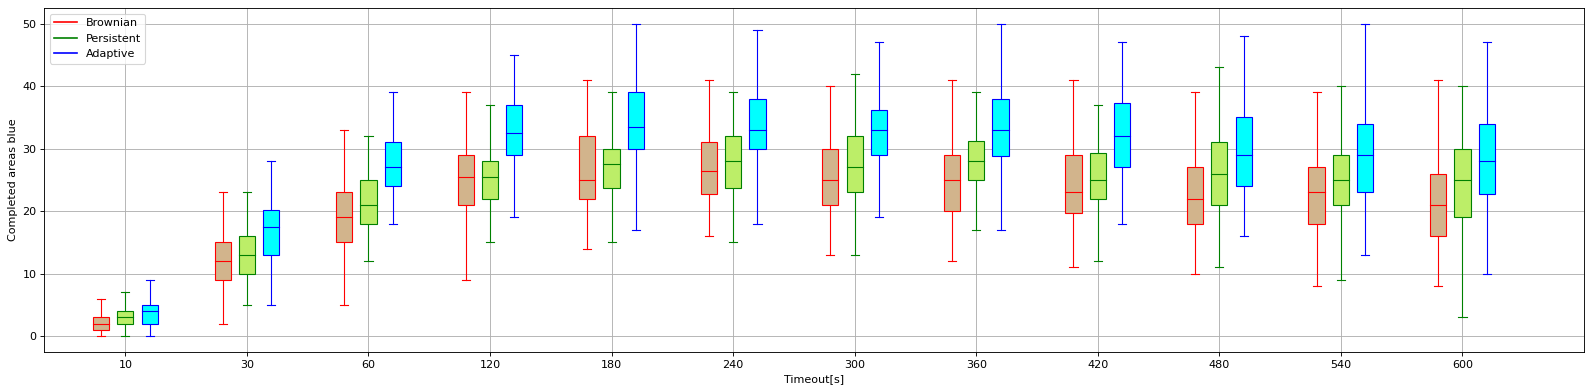

In [99]:
boxplot_3dict(brownian_dict_red,persistent_dict_red,adaptive_dict_red)

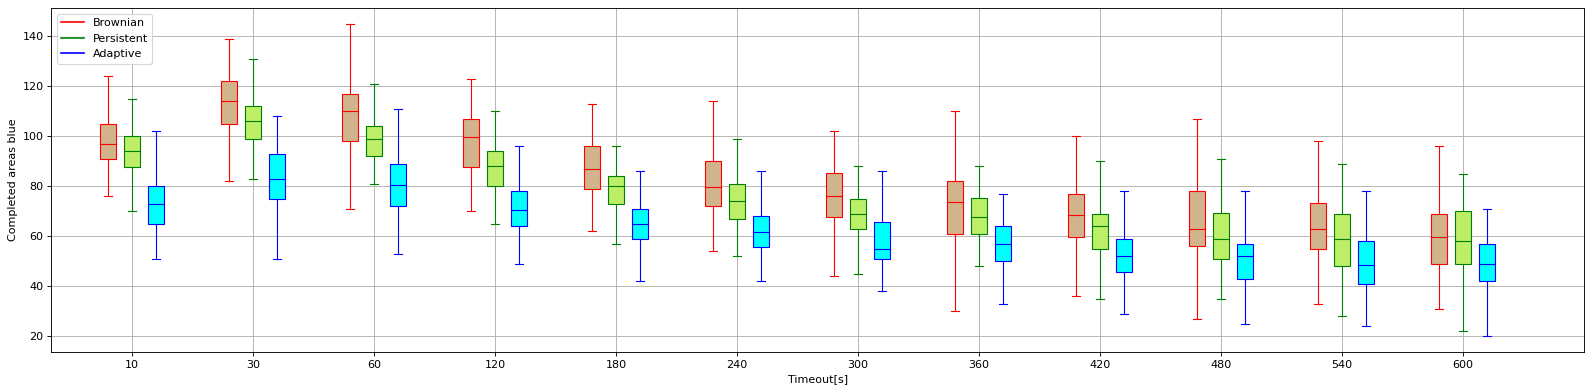

In [100]:
boxplot_3dict(brownian_dict_blue,persistent_dict_blue,adaptive_dict_blue)

### Brownian

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), dpi=80)
ax1.boxplot(completed_task_blue_dict.values(), flierprops=green_diamond)
ax2.boxplot(completed_task_red_dict.values(), flierprops=green_diamond)
ax1.set_xticklabels(completed_task_red_dict.keys())
ax2.set_xticklabels(completed_task_red_dict.keys())
ax1.grid()
ax2.grid()

ax1.set_yticks(np.arange(0,200,50)) 
ax2.set_yticks(np.arange(0,200,50)) 
# ax.set_yticklabels([1,4,5], fontsize=12)
# plt.show()

figName = "completedTaskMean_Mixed_brownian_"+results_folder.split("/")[-1]+'.png'
print("Figure name: ", figName)

plt.savefig(figName)

### Persistent

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), dpi=80, sharey=True)
ax1.boxplot(completed_task_blue_dict.values(), flierprops=green_diamond)
ax2.boxplot(completed_task_red_dict.values(), flierprops=green_diamond)
ax1.set_xticklabels(completed_task_red_dict.keys())
ax2.set_xticklabels(completed_task_red_dict.keys())
ax1.grid()
ax2.grid()

ax1.set_yticks(np.arange(0,200,50)) 
ax2.set_yticks(np.arange(0,200,50))

# plt.show()

figName = "completedTaskMean_Mixed_persistent_"+results_folder.split("/")[-1]+'.png'
print("Figure name: ", figName)

plt.savefig(figName)

### Adaptive

Figure name:  completedTaskMean_Mixed_adaptive_Regions.png


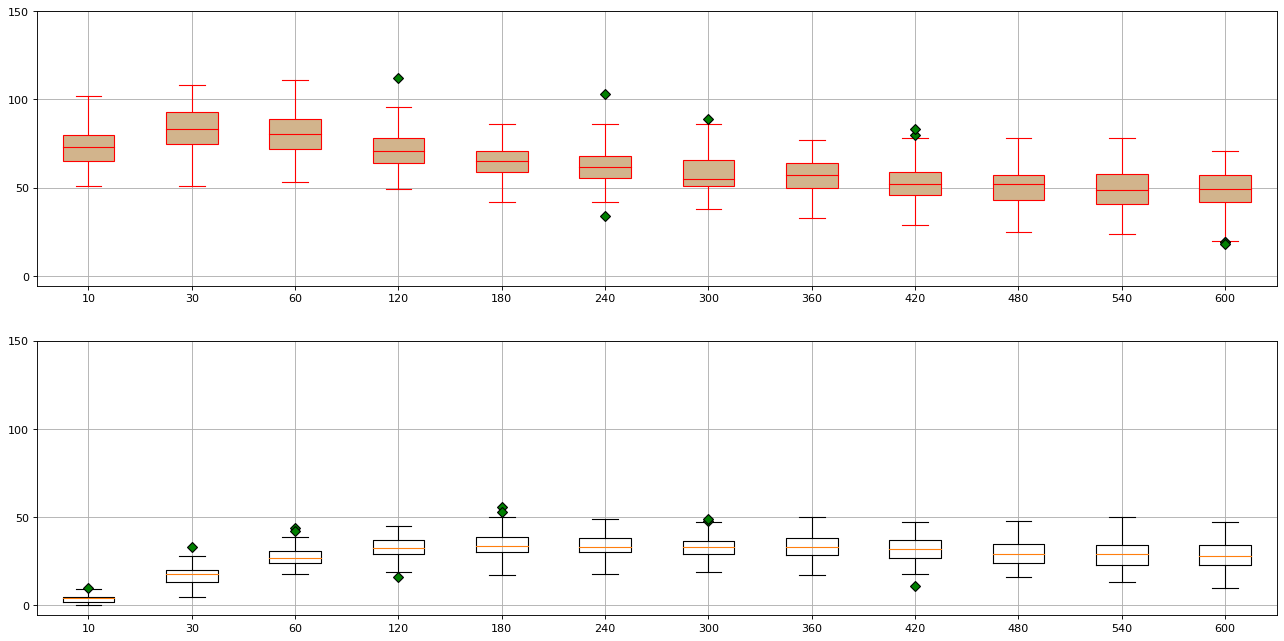

In [34]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(20, 10), dpi=80, sharey=True)
c = "red"

box1 = ax1.boxplot(completed_task_blue_dict.values(), flierprops=green_diamond,patch_artist=True)
for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
    plt.setp(box1[element], color=c)

for patch in box1['boxes']:
    patch.set(facecolor='tan')

# ax1.boxplot(completed_task_blue_dict.values(), flierprops=green_diamond,patch_artist=True,boxprops=dict(facecolor='white', color=c),whiskerprops=dict(color=c), capprops=dict(color=c))
ax2.boxplot(completed_task_red_dict.values(), flierprops=green_diamond)
ax1.set_xticklabels(completed_task_red_dict.keys())
ax2.set_xticklabels(completed_task_red_dict.keys())
ax1.grid()
ax2.grid()

ax1.set_yticks(np.arange(0,200,50)) 
ax2.set_yticks(np.arange(0,200,50))

# plt.show()

figName = "completedTaskMean_Mixed_adaptive_"+results_folder.split("/")[-1]+'.png'
print("Figure name: ", figName)

# plt.savefig(figName)

In [33]:
def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)  

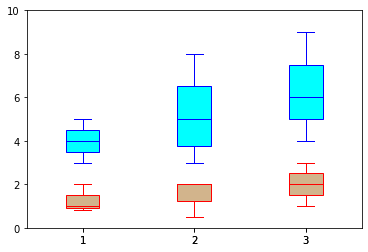

In [31]:
import matplotlib.pyplot as plt

def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
example_data1 = [[1,2,0.8], [0.5,2,2], [3,2,1]]
example_data2 = [[5,3, 4], [6,4,3,8], [6,4,9]]

fig, ax = plt.subplots()
box_plot(example_data1, 'red', 'tan')
box_plot(example_data2, 'blue', 'cyan')
ax.set_ylim(0, 10)
plt.show()
